In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict
import ROOT
from ROOT import gROOT
import math

Welcome to JupyROOT 6.24/00


In [2]:
import CMS_lumi, tdrstyle
from array import array

#set the tdr style
tdrstyle.setTDRStyle()

In [3]:
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Simulation"
CMS_lumi.lumi_sqrtS = "13 TeV" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
#CMS_lumi.lumi_sqrtS = ""

iPos = 11
iPos = 0
if( iPos==0 ): CMS_lumi.relPosX = 0.12

In [4]:
H_ref = 600; 
W_ref = 800; 
W = W_ref
H  = H_ref

# 
# Simple example of macro: plot with CMS name and lumi text
#  (this script does not pretend to work in all configurations)
# iPeriod = 1*(0/1 7 TeV) + 2*(0/1 8 TeV)  + 4*(0/1 13 TeV) 
# For instance: 
#               iPeriod = 3 means: 7 TeV + 8 TeV
#               iPeriod = 7 means: 7 TeV + 8 TeV + 13 TeV 
#               iPeriod = 0 means: free form (uses lumi_sqrtS)
# Initiated by: Gautier Hamel de Monchenault (Saclay)
# Translated in Python by: Joshua Hardenbrook (Princeton)
# Updated by:   Dinko Ferencek (Rutgers)
#

iPeriod = 3

# references for T, B, L, R
T = 0.08*H_ref
B = 0.15*H_ref 
L = 0.15*W_ref
R = 0.04*W_ref

canvas = ROOT.TCanvas("c2","c2",50,50,W,H)
canvas.SetFillColor(0)
canvas.SetBorderMode(0)
canvas.SetFrameFillStyle(0)
canvas.SetFrameBorderMode(0)
canvas.SetLeftMargin( L/W )
canvas.SetRightMargin( R/W )
canvas.SetTopMargin( T/H )
canvas.SetBottomMargin( B/H )
canvas.SetTickx(1)
canvas.SetTicky(1)

padsize1 = 1
padsize2 = 0
padsize3 = 0

In [5]:
xmin = 0
xmax = 25.0
ymin = 4.17 * 0.8
ymax = 4.17 * 1.3
ytitle = "Throughput [evt/s]"
xtitle = "nThreads per job"

In [6]:
dfs = OrderedDict()
dfs["Cloud"] = pd.read_csv('cross_site/results_cloud.csv', header=None, delimiter=r"\s+")
dfs["Purdue"] = pd.read_csv('cross_site/results_purdue.csv', header=None, delimiter=r"\s+")

In [7]:
dfs['Cloud']

,0,1
0,4,4.58
1,8,4.56
2,12,4.48
3,16,4.30
4,20,3.75


In [8]:
h1 = ROOT.TH1F("h1", "h1", 80, xmin, xmax)
h1.SetMinimum(ymin)
h1.SetMaximum(ymax)
#print "xmin : %f xmax : %f"%(xmin, xmax)
h1.GetXaxis().SetNdivisions(6, 5, 0)
h1.GetXaxis().SetTitle(xtitle)
h1.GetYaxis().SetNdivisions(6, 5, 0)
h1.GetYaxis().SetTitle(ytitle)
h1.GetYaxis().SetTitleSize(0.050/(padsize1+padsize3))
h1.GetYaxis().SetLabelSize(0.045/(padsize1+padsize3))
h1.GetXaxis().SetTitleSize(0.050/(padsize1+padsize3))
h1.GetXaxis().SetLabelSize(0.045/(padsize1+padsize3))
h1.GetYaxis().SetTitleOffset(1.35*(padsize1+padsize3)*(600.0/W))
h1.GetXaxis().SetTitleOffset(1.1*(padsize1+padsize3))
h1.Draw()

In [9]:
graphs = []
colors = [2,4,3]
styles = [20, 21, 22, 23]

for key, val in dfs.items():
    # TGraphErrors only support array.array, not numpy arrays..???
    xvals = array('d', val.iloc[:,0].tolist())
    yvals = array('d', val.iloc[:,1].tolist())
    gr = ROOT.TGraph(5, xvals, yvals)
    print(xvals)
    print(yvals)
    graphs.append(gr)

for m in range(len(graphs)):
    graphs[m].SetLineColor( colors[m] )
    graphs[m].SetLineWidth( 2 )
    graphs[m].SetMarkerColor( colors[m] )
    graphs[m].SetMarkerStyle( styles[m] )
    print("drawing")
    graphs[m].Draw('LEPsame')

array('d', [4.0, 8.0, 12.0, 16.0, 20.0])
array('d', [4.58, 4.56, 4.48, 4.3, 3.75])
array('d', [4.0, 8.0, 12.0, 16.0, 20.0])
array('d', [4.6, 4.57, 4.43, 4.27, 3.71])
drawing
drawing


In [10]:
testLine = ROOT.TLine(xmin, 4.17, xmax, 4.17)
testLine.SetLineStyle(2)
testLine.SetLineWidth(2)
testLine.SetLineColor(1)
testLine.Draw('same')

In [11]:
CMS_lumi.CMS_lumi( canvas, 0, iPos )
legend = ROOT.TLegend(0.45,0.7,0.75,0.9);
#legend.SetHeader("The Legend Title","C"); // option "C" allows to center the header
legend.AddEntry(graphs[0],'SONIC with HEPCloud Server',"epl");
legend.AddEntry(graphs[1],"SONIC with Purdue Server","epl");
legend.AddEntry(testLine,'Average of ``Direct-inference" Jobs',"l");
#gStyle.SetLegendBorderSize(1);
#gStyle.SetLegendFillColor(0);
legend.SetTextFont(42);
legend.SetTextSize(0.035);
legend.Draw('same');

13 TeV


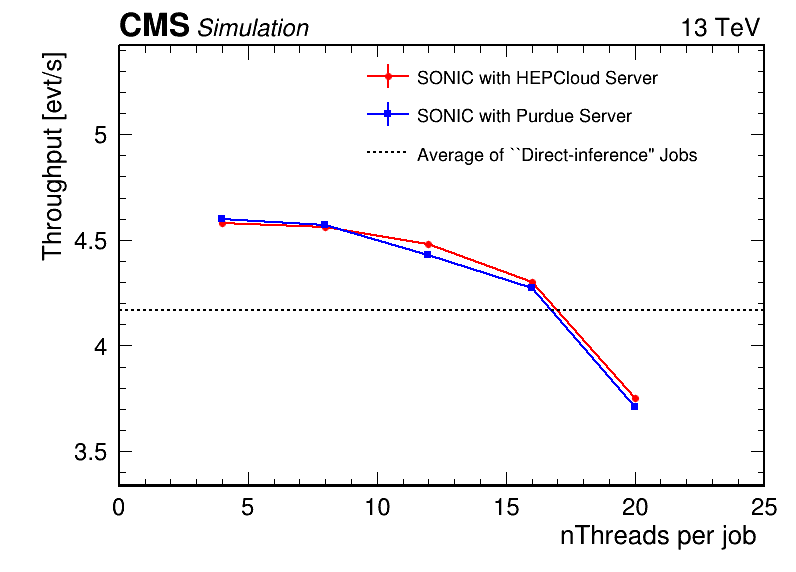

In [12]:
canvas.Draw()

In [13]:
canvas.SaveAs("throughput_crosssite.pdf")

Info in <TCanvas::Print>: pdf file throughput_crosssite.pdf has been created
